   0  1  2
0  1  2  1
1  1  3 -1
2  2  3 -1
3  1  4 -1
4  3  4  1
Name: 
Type: Graph
Number of nodes: 16
Number of edges: 58
Average degree:   7.2500


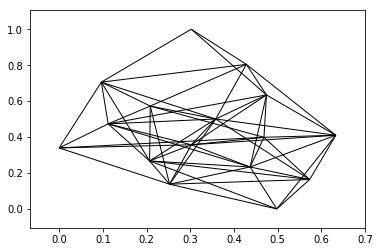

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

df = pd.read_csv("/Volumes/theory/DataSets/out.ucidata-gama", header=None, comment="%", sep="\t")
print df.head()

g = nx.from_pandas_dataframe(df, 0, 1)
print nx.info(g)

nx.draw_networkx_edges(g, pos=nx.spring_layout(g))
plt.show()

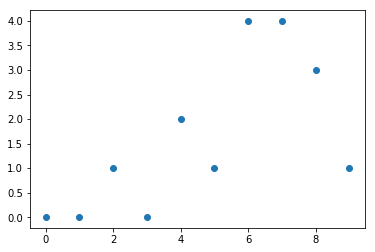

In [5]:
dd_k = g.degree().keys()
dd_h = nx.degree_histogram(g)[1:]
plt.scatter(range(len(dd_h)), dd_h)

In [71]:
dist = nx.degree_histogram(g)[1:]
df = pd.DataFrame.from_dict(g.degree().items())
gb = df.groupby([1]).count()
dist= gb[0].values

# s = float(np.sum(gb[0].values))
# cnt = float(len(gb[0].values))
# cdf = 0
# orig_p = []
# for x in gb[0].values:
#     if s == 0:
#       continue
#     wgt = x/s
#     cdf += wgt
#     orig_p.append(cdf)

In [72]:
def deg_dist_CDF(dist):
    s = float(np.sum(dist))
    cnt = float(len(dist))
    cdf = 0
    orig_p = []
    for x in dist:
        if s == 0:
          continue
        wgt = x/s
        cdf += wgt
        orig_p.append(cdf)
    return orig_p

(10,) (11,)


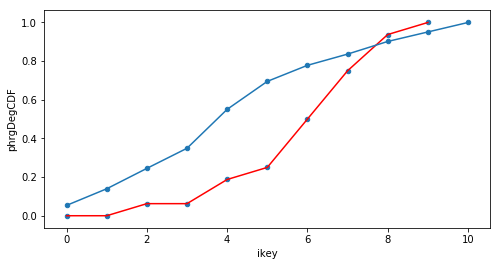

In [114]:
import numpy as np
fig, ax = plt.subplots(figsize=(8, 4))

dat = np.loadtxt("/Volumes/theory/Grammars/TreeDecomps/utils/pltdata/dd_xphrg_isom_interxn.dat",
                delimiter="\t")
datcdf = deg_dist_CDF(dat[:,1])
origcdf= deg_dist_CDF(nx.degree_histogram(g)[1:])
ax.plot(origcdf,color="r")
ax.plot(datcdf)

print np.shape(origcdf), np.shape(datcdf)
df = pd.DataFrame(np.transpose(origcdf),columns=["origCDF"])
df['ikey'] = df.index
df1= pd.DataFrame(np.transpose(datcdf),columns=['phrgDegCDF'])
df1['ikey'] = df1.index
df = pd.merge(df,df1,on="ikey", how="outer")
df.plot.scatter(x='ikey', y="origCDF", ax=ax)
df.plot.scatter(x='ikey', y="phrgDegCDF", ax=ax)
df[['ikey','origCDF','phrgDegCDF']].to_csv("/Volumes/theory/Grammars/TreeDecomps/utils/pltdata/ucidata-gama_degCDF.dat",index=False,sep="\t")